# **IRIS dataset classification (^_^)**



In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv("/content/Iris.csv")

In [ ]:
#understand data
df.head()
df.shape
df.describe()
df.memory_usage()
df.tail()
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
#select multiple columns
print(df[['SepalLengthCm','Species']][0:5])

#read rach row
df.iloc[149]
df.iloc[140:149]

   SepalLengthCm      Species
0            5.1  Iris-setosa
1            4.9  Iris-setosa
2            4.7  Iris-setosa
3            4.6  Iris-setosa
4            5.0  Iris-setosa


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#extract class labels
labels = df["Species"]
labels.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
labels_grp = df.groupby('Species')
labels_grp.sum()
labels_grp.max()
labels_grp.min()
labels_grp.mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


# Visualization

Text(0.5, 1.0, 'Sepal length vs sepal width')

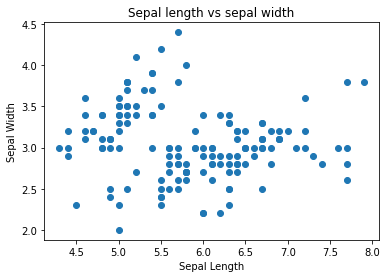

In [ ]:
#Visualization
import matplotlib.pyplot as plt

plt.scatter(df.SepalLengthCm,df.SepalWidthCm) #[replace scatter] => line,bar
#plt.pie([33.33,33.33,33.33] , labels = ['Setosa', 'Virginica','Versicolor']) #[replace scatter] => pie,
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal length vs sepal width')

In [ ]:
#presprocessing

# 1. dropping values
v_1 = df.drop(['Id','Species'],axis=1)
v_1
#v_2 = df.dropna()
#v_3 = df.fillna(value) #[value] => replace empty field with value

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#data preparation for model creation
from sklearn.model_selection import train_test_split
print('[target features] => Species')
y = df['Species']

print('[predictor features] => SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm')

X_train,X_test, y_train,y_test = train_test_split(v_1,y, test_size=0.3)


[target features] => Species
[predictor features] => SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm


# Model Creation


## 1. naive_bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
ML3 = GaussianNB()
ML3.fit(X_train,y_train)
p0 = ML3.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,p0))

0.9777777777777777



## 2. DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

model = clf.fit(X_train,y_train)
p1 = clf.predict(X_test)
print(accuracy_score(y_test,p1))



0.9777777777777777


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(clf , out_file= 'Dtree.dot')
!dot -Tpng Dtree.dot -o Dtree.png